### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from prettytable import PrettyTable
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout

In [7]:
#read the csv that contains our data and print the first 5 rows of it
df = pd.read_csv(r"D:\Desktop\SVM.csv")
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


First of all we observe the name of these columns is quite long and full of spaces, let's rename them:

In [8]:
#Changing the name of some columns
df.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']

Now let's look for null values and object datatypes we might want to transform into numerical values:

In [9]:
#Looking for null values
df.isna().sum()

mean_profile           0
std_profile            0
kurtosis_profile    2502
skewness_profile       0
mean_dmsnr             0
std_dmsnr           1702
kurtosis_dmsnr         0
skewness_dmsnr       869
target              5370
dtype: int64

In [10]:
df.isnull().any()

mean_profile        False
std_profile         False
kurtosis_profile     True
skewness_profile    False
mean_dmsnr          False
std_dmsnr            True
kurtosis_dmsnr      False
skewness_dmsnr       True
target               True
dtype: bool

In [11]:
#Looking for object datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      17898 non-null  float64
 1   std_profile       17898 non-null  float64
 2   kurtosis_profile  15396 non-null  float64
 3   skewness_profile  17898 non-null  float64
 4   mean_dmsnr        17898 non-null  float64
 5   std_dmsnr         16196 non-null  float64
 6   kurtosis_dmsnr    17898 non-null  float64
 7   skewness_dmsnr    17029 non-null  float64
 8   target            12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


After having checked there are no null values and all columns contain numerical values, let's take a look at some information about our data:

In [12]:
#Show statistical information of our data
df.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


Just by looking at this table we can extract some important information of our data, for example if we take a look at the target column we can see the max value is 1 (pulse star) and the minimum value is 0 (not a star) while the mean of this column tends to 0, which lets us know there are more "false pulse stars" than actual stars. Additionally we clearly see this data needs some scaling since the difference between values is noticeable

At this point we are going to plot some things that might be of our interest from this dataset. First of all knowing our target variable let's see the difference between values, or better said, the proportion between them:

In [13]:
#counting pulsars and not pulsars
pulsar = df[df['target'] ==1]
pulsar_count = pulsar["target"].value_counts()[1]
not_pulsar = df[df['target'] == 0]
not_pulsar_count = not_pulsar["target"].value_counts()[0]

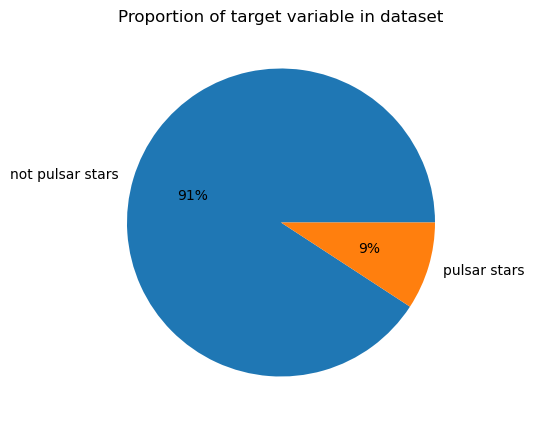

There are 1153 signals that belong to pulsar stars and 11375 signals that aren't from pulsars.


In [14]:
#pie plotting the stats between pulsars and not pulsars
plt.figure(figsize=(5,5))
plt.pie(df["target"].value_counts().values,labels=["not pulsar stars","pulsar stars"], autopct="%1.0f%%")
plt.title("Proportion of target variable in dataset")
plt.show()
print("There are " + str(pulsar_count) + " signals that belong to pulsar stars " 
      + "and " + str(not_pulsar_count) + " signals that aren't from pulsars.")

<AxesSubplot:>

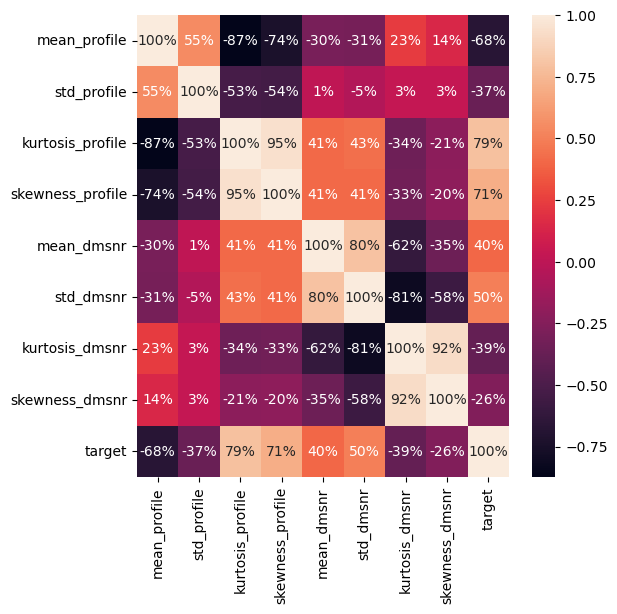

In [15]:
#plot correlation matrix
plt.figure(figsize=(6,6))
sns.heatmap(df.iloc[:,0:9].corr(), annot=True, fmt='.0%')

Something curious we can see from this correlation matrix is that four of the eight features we have in our dataset correlate positively with our target variable whilst the other four correlate negatively; this is really going to help when training our model since the separation between classes becomes clear. Having said that let's go deeper into investigating these features!

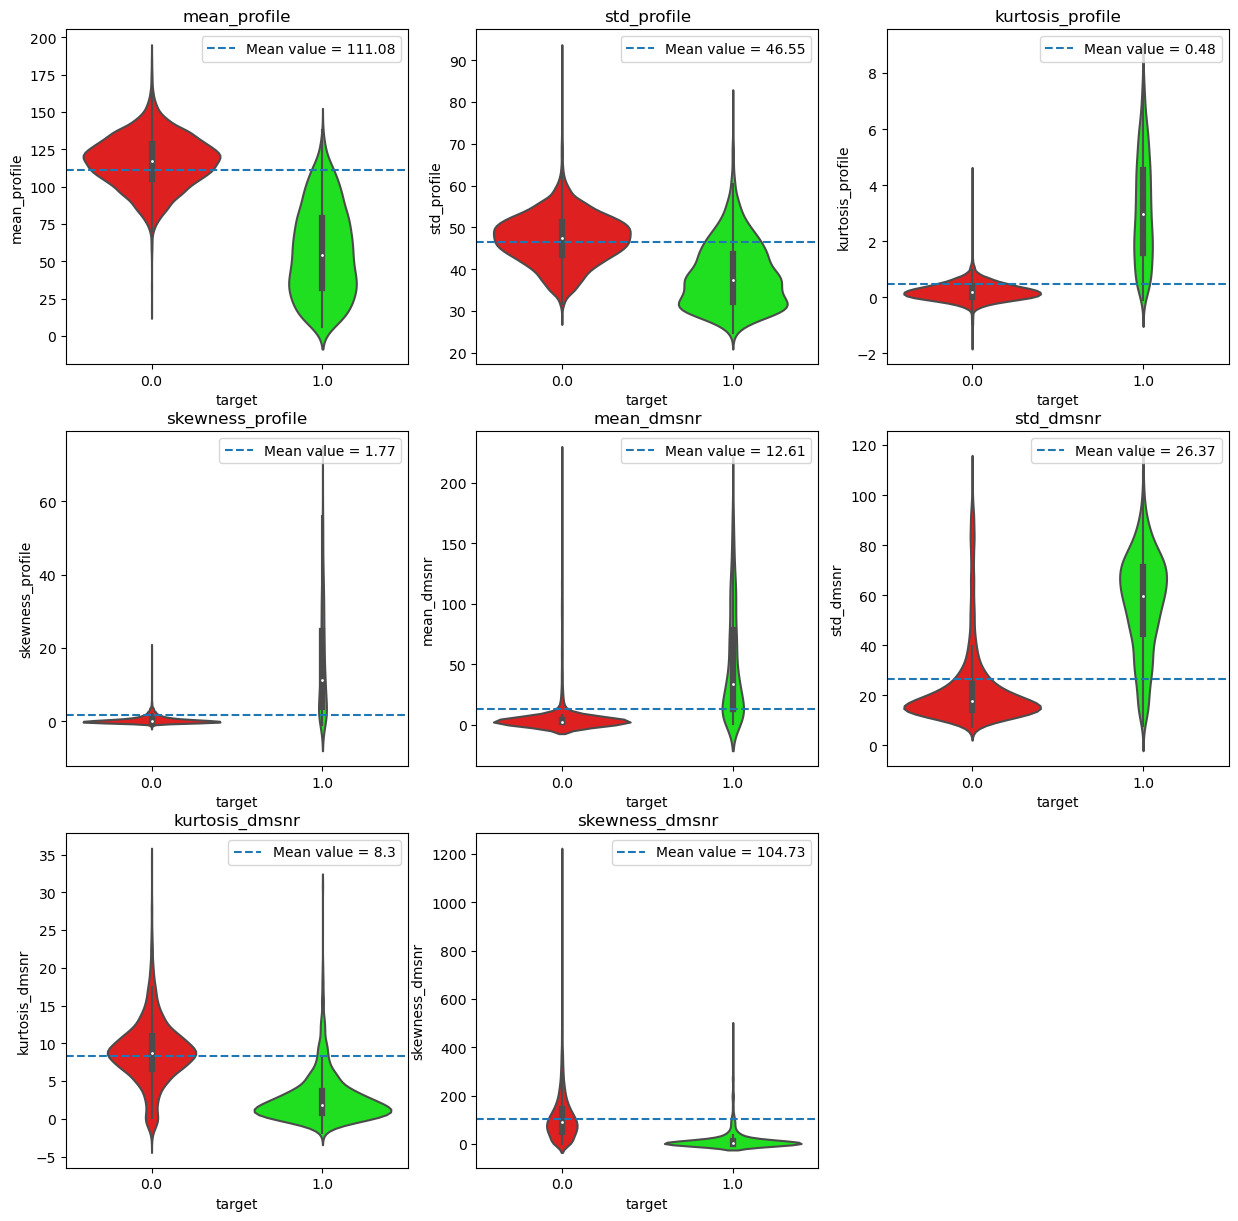

In [16]:
#violinlpot of all features
features = df.iloc[:,0:8]
plt.figure(figsize=(15,20))
j = 0
for i in features:
    plt.subplot(4,3,j+1)
    sns.violinplot(x=df["target"],y=df[i],palette=["red","lime"])
    plt.title(i)
    plt.axhline(df[i].mean(),linestyle = "dashed", label ="Mean value = " + str(round(df[i].mean(), 2)))
    plt.legend(loc="best")
    j = j + 1

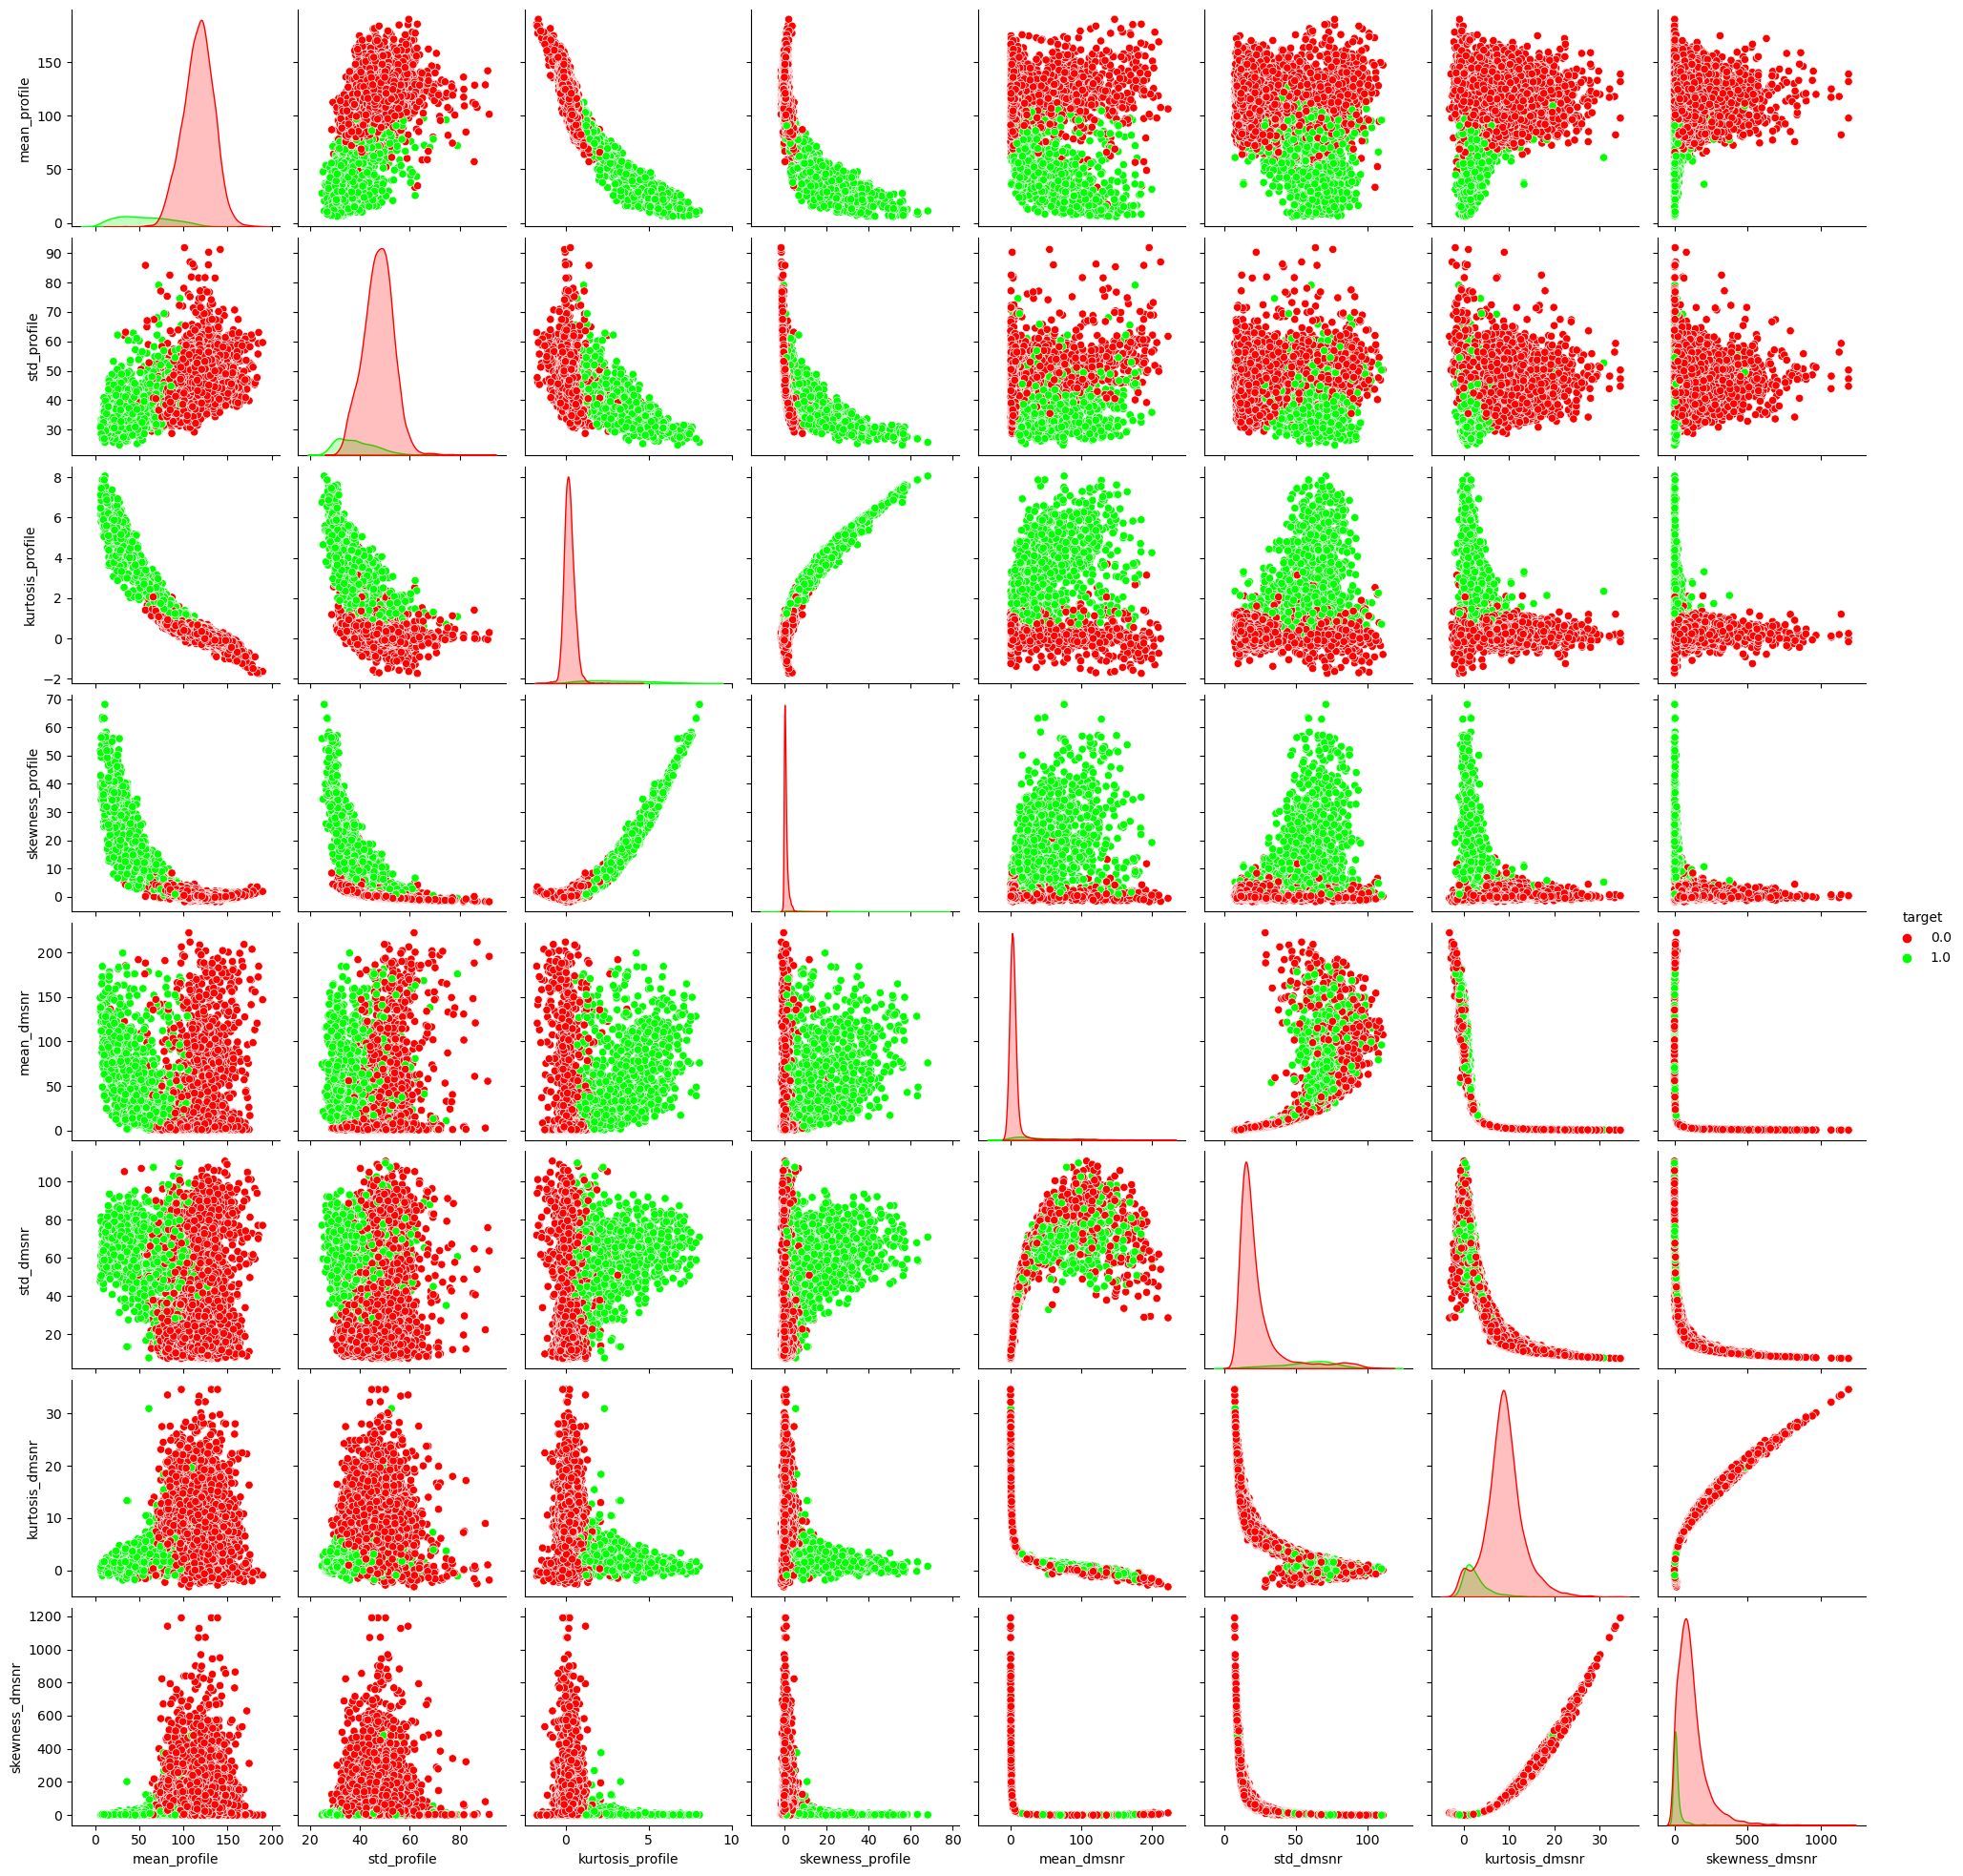

In [17]:
#pairplot between features
sns.pairplot(df, hue="target", palette=["red","lime"])

In [18]:
#Separing our features from target variable
X = df.iloc[:,0:8].values
y = df.iloc[:,8].values

In [19]:
#Splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [20]:
#define a sequential Model
model = Sequential()

#First hidden layer
model.add(Dense(16,activation='relu',input_dim=8))
model.add(Dropout(0.25))

#Second hidden Layer
model.add(Dense(8,activation = 'relu'))
model.add(Dropout(0.25))

#Output layer
model.add(Dense(1,activation='sigmoid'))

In [21]:
#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
#Printing a summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [23]:
df.fillna(method='ffill', inplace=True)

In [24]:
df

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,22.362553,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,0.0
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,0.0
17895,136.171875,48.924385,0.377599,0.063227,2.810201,18.695230,7.848577,69.388978,0.0
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,0.0


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(df)

print(standardized_data)

[[ 0.39280351  0.26646793 -0.09279729 ... -0.18945593 -0.3711705
  -0.26240498]
 [-1.32975704 -1.51599848  0.22720506 ...  0.24658334 -0.01985031
  -0.26240498]
 [ 0.76040086  0.97618058 -0.32238228 ...  0.04545256 -0.28819348
  -0.26240498]
 ...
 [ 0.97815736  0.34704869 -0.09079188 ... -0.10097271 -0.33161174
  -0.26240498]
 [-0.17854083  0.36776144 -0.21584479 ...  0.15634484 -0.04187917
  -0.26240498]
 [-0.01560414 -1.21246414 -0.0127027  ... -0.52459536 -0.60852151
  -0.26240498]]


In [26]:
X = df . iloc[:, :1].values
y = df . iloc[:, -1].values
y

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
from sklearn.model_selection import train_test_split

predictors = df.drop('target', axis = 1)
target = df['target']
X_train, X_test, y_train, y_test = train_test_split(predictors, target, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

models = []
acc = []
f1 = []

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l1', C = 7.74, solver = 'liblinear')

classifier.fit(X_train, y_train)

LogisticRegression(C=7.74, penalty='l1', solver='liblinear')

In [30]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred = classifier.predict(X_test)

LR_acc = accuracy_score(y_test, y_pred)
LR_f1 = f1_score(y_test, y_pred)

models.append('LR')
acc.append(LR_acc)
f1.append(LR_f1)

LR_cm = confusion_matrix(y_test, y_pred, labels = [1,0])

print('Accuracy: ', LR_acc)
print('F1 Score: ', LR_f1)

Accuracy:  0.9582122905027933
F1 Score:  0.6382978723404255


In [33]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan')

classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [34]:
y_pred = classifier.predict(X_test)

KNN_acc = accuracy_score(y_test, y_pred)
KNN_f1 = f1_score(y_test, y_pred)

models.append('KNN')
acc.append(KNN_acc)
f1.append(KNN_f1)

KNN_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

print('Accuracy: ', KNN_acc)
print('F1 Score: ', KNN_f1)

Accuracy:  0.955977653631285
F1 Score:  0.6513274336283185


C:\Users\gopat\OneDrive\Documents\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.svm import SVC

classifier = SVC()

hyperparameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


clf = GridSearchCV(classifier, hyperparameters, 
                   verbose = 1, cv = 3)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best C:', best_model.best_estimator_.get_params()['C'])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
classifier = SVC(C=1000)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

SVM_acc = accuracy_score(y_test, y_pred)
SVM_f1 = f1_score(y_test, y_pred)

models.append('SVM')
acc.append(SVM_acc)
f1.append(SVM_f1)

SVM_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

print('Accuracy: ', SVM_acc)
print('F1 Score: ', SVM_f1)